In [223]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.metrics import mape
sub_ind = 0

In [4]:
#df_tr_all = pd.read_csv("data/train_data.csv")

#df_tr_all["DATET"] =  pd.to_datetime(df_tr_all.DATA_TRANS.str[:10], format="%d.%m.%Y")

import pickle
pickle.dump(df_tr_all, open("data/data_with_date2.p","wb"))

df_tr_all_s[df_tr_all_s.DATET>pd.Timestamp('2016-01-01')]

In [305]:
data_date = pickle.load(open("data/data_with_date2.p","rb"))

In [207]:
df_te_all = pd.read_csv("data/test_data.csv")

In [ ]:
#df_te_all = pd.read_csv("data/full_test_data.csv")

In [157]:
df_te_all.drop(df_te_all[df_te_all.DATA_TRANS.str.len() < 2].index, inplace=True)
df_te_all[df_te_all.DATA_TRANS.str.len() < 2]

,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,CENA_CLIENT


In [158]:
df_te_all["DATET"] =  pd.to_datetime(df_te_all.DATA_TRANS.str[:10], format="%d.%m.%Y")

import pickle
pickle.dump(df_te_all, open("data/full_test_data_with_date2.p","wb"))



In [79]:
data_date = data_date[data_date.DATET > pd.Timestamp('2017-01-01')]
data_date = data_date[data_date.COL_LITR < data_date.COL_LITR.quantile(0.98)]

data_date.shape, data_date.shape

((28725163, 9), (28725163, 9))

In [147]:
data_date[(data_date.CLIENT == 1)&(data_date.VID_NP==2)&(data_date.AZS_NUMBER==3731)]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,datetime,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG
4793478,4793478,4793478,1,25.01.2017 11:27:30,3731,12,2,30.0,34.6,2017-01-25,2017-01-25,2017-01-25,25,2,False,False,4,False,13731,10012
7606177,7606177,7606177,1,16.03.2017 11:49:36,3731,12,2,30.0,34.6,2017-03-16,2017-03-16,2017-03-16,16,3,False,False,11,False,13731,10012


In [7]:
test_date = pd.Timestamp('2017-12-01')

In [208]:
test_data = pickle.load(open("data/test_data_with_date2.p","rb"))

In [160]:
test_data[:1]

,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,CENA_CLIENT,DATET
0,0,19917,01.01.2018 1:52:43,1641,21.0,2.0,36.9,2018-01-01


In [161]:
ftlist = ["day","dayofweek","is_month_end","is_month_start","week","dayofweek"]




ftlist = ["day","dayofweek","is_month_end","is_month_start","week","dayofweek","CENA_CLIENT"]
ftlist+= ["REGION_AZS","CLIENT","VID_NP"]

cat_cols = ["CLIENT","REGION_AZS"]

ftlist

['day',
 'dayofweek',
 'is_month_end',
 'is_month_start',
 'week',
 'dayofweek',
 'CENA_CLIENT',
 'REGION_AZS',
 'CLIENT',
 'VID_NP']

In [109]:
test_date = pd.Timestamp('2017-12-01')
data_date_train =  data_date#[data_date.datetime < test_data]
data_date_test = test_data
#data_date[data_date.datetime >= test_data]
data_date_test.head()
print(data_date_train.shape, data_date_test.shape)


(28725163, 11) (1000000, 8)


In [ ]:
test_date = pd.Timestamp('2017-12-01')
data_date_train =  [data_date.datetime < test_data]
data_date_test = data_date[data_date.datetime >= test_data]
data_date_test.head()
print(data_date_train.shape, data_date_test.shape)


#data_date_train["DATET"] = data_date_train.datetime
#data_date_n.drop("datetime", axis=1)
data_date_train["day"] = data_date_train.DATET.dt.day
data_date_train["dayofweek"] = data_date_train.DATET.dt.dayofweek
data_date_train["is_month_end"] = data_date_train.DATET.dt.is_month_end
data_date_train["is_month_start"] = data_date_train.DATET.dt.is_month_start
data_date_train["week"] = data_date_train.DATET.dt.week
data_date_train["weekend"] = data_date_train.DATET.dt.dayofweek>=5

#data_date_test["DATET"] = data_date_test.DATE

test_data["day"] = test_data.DATET.dt.day
test_data["dayofweek"] = test_data.DATET.dt.dayofweek
test_data["is_month_end"] = test_data.DATET.dt.is_month_end
test_data["is_month_start"] = test_data.DATET.dt.is_month_start
test_data["week"] = test_data.DATET.dt.week
test_data["weekend"] = test_data.DATET.dt.dayofweek>=5

print("build time ft ok")

In [87]:
test_date = pd.Timestamp('2017-12-01')
start_date = pd.Timestamp('2017-01-01')

data_date_train1 =  data_date[data_date.DATET < test_date]
data_date_train1 =  data_date_train1[data_date.DATET > start_date]

data_date_test1 = data_date[data_date.DATET >= test_date]
data_date_test1.head()
print(data_date_train1.shape, data_date_test1.shape)


#data_date_n.drop("datetime", axis=1)
data_date_train1["day"] = data_date_train1.DATET.dt.day
data_date_train1["dayofweek"] = data_date_train1.DATET.dt.dayofweek
data_date_train1["is_month_end"] = data_date_train1.DATET.dt.is_month_end
data_date_train1["is_month_start"] = data_date_train1.DATET.dt.is_month_start
data_date_train1["week"] = data_date_train1.DATET.dt.week
data_date_train1["weekend"] = data_date_train1.DATET.dt.dayofweek>=5


data_date_test1["day"] = data_date_test1.DATET.dt.day
data_date_test1["dayofweek"] = data_date_test1.DATET.dt.dayofweek
data_date_test1["is_month_end"] = data_date_test1.DATET.dt.is_month_end
data_date_test1["is_month_start"] = data_date_test1.DATET.dt.is_month_start
data_date_test1["week"] = data_date_test1.DATET.dt.week
data_date_test1["weekend"] = data_date_test1.DATET.dt.dayofweek>=5
data_date_test1["COL_LITR_TRUE"] = data_date_test1["COL_LITR"]    

print("build time ft ok")

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(25162843, 9) (3562320, 9)


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

build time ft ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
data_date.DATET.max()

In [ ]:
data_date_full = data_date_train.append(data_date_test[data_date_test.CLIENT.isin(data_date_train.CLIENT)])
data_date_train.shape, data_date_test.shape, data_date_full.shape

In [182]:
data_date_full = data_date_train

In [183]:
data_date_train["month"] = data_date_train.DATET.dt.month
#data_date_train[data_date_train.DATET.dt.month == 12]

In [184]:
grp = data_date_full.groupby(["CLIENT",10*data_date_full.DATET.dt.year+data_date_full.DATET.dt.month])

In [185]:
s = grp.agg({"COL_LITR":["sum","median", "mean"], "CENA_CLIENT":"median"} )

s = s.unstack()


In [186]:
s["meanMnoth"]= s["COL_LITR","sum"].mean(axis=1)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [187]:
 s["COL_LITR","sum"][:4]

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


DATET,20171,20172,20173,20174,20175,20176,20177,20178,20179,20180,20181,20182
CLIENT,,,,,,,,,,,,
1,4486463.045,5339067.37,5956506.956,5694085.731,4702833.26,NaN,NaN,55.16,1420.11,61530.78,2866613.705,1.098982e+07
2,395.370,552.17,482.560,580.180,516.37,481.04,326.41,548.90,712.26,952.91,764.610,7.758400e+02
3,14808.570,13626.15,12548.610,6831.890,7317.32,8444.79,10292.77,11924.03,11253.22,13590.71,11482.450,1.452299e+04
4,2859.240,1131.38,3706.350,2811.210,1232.80,1030.00,346.77,13.73,4118.60,3539.71,2659.270,2.573050e+03


In [188]:
def getlvl( ind, i, maxi):
    if i == maxi-1:
        res = ind.levels[i]   
    else:  
        lvllist = getlvl(ind, i+1, maxi)
        res =    [a+"_"+b for a in  ind.levels[i]    for b in lvllist]
    return [str(s) for s in res]
#s.columns = getlvl(s.columns,0,len(s.columns.levels))
#s["COL_LITR","median"].div(sm,axis='rows')
seg1 = 40000
seg2 = 1500000
s[s["meanMnoth"]<seg1]["COL_LITR","median"].std(axis=1).mean()

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


10.589981181190458

In [189]:
s[s["meanMnoth"]>seg2]["COL_LITR","median"].std(axis=1).mean()

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


19.386324942010727

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)
/usr/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


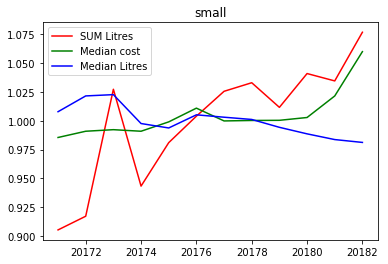

(0.06, 40000)


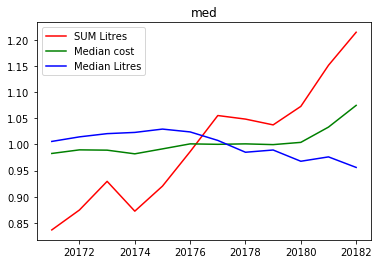

(40000, 1500000)


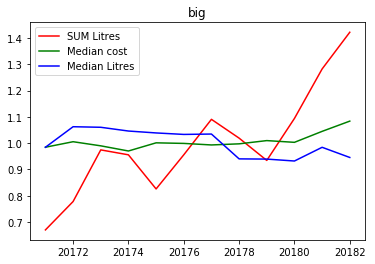

(1500000, 7814985.324999944)


In [206]:
s[(s["meanMnoth"]>seg1)&(s["meanMnoth"]<seg2)]["COL_LITR","median"].std(axis=1).mean()

def f(s,seg1,seg2,name):
    s = s[(s["meanMnoth"]>seg1)&(s["meanMnoth"]<seg2)]
    #print(s["COL_LITR","mean"].mean(),s["CENA_CLIENT","median"].median() )
    plt.plot(s["COL_LITR","sum"].div(s["COL_LITR","sum"].mean().mean()).mean(),  color="red", label='SUM Litres')
    plt.plot(s["CENA_CLIENT","median"].div(s["CENA_CLIENT","median"].median().median()).median(), color="green",label='Median cost')
    plt.plot(s["COL_LITR","median"].div(s["COL_LITR","median"].mean().mean()).mean(), color="blue",label='Median Litres')
    plt.legend()
    plt.title(name)
    plt.savefig('SEG_'+name+".png")
# s["CENA_CLIENT","median"].mean().tolist(),
    plt.show()
    return (seg1,seg2)
    

print(f(s,s["meanMnoth"].min(),seg1,"small"))
print(f(s,seg1,seg2,"med"))
print(f(s,seg2, s["meanMnoth"].max(),"big"))


In [140]:
res = s.reset_index().pivot(index='CLIENT', columns='DATET', values=s["COL_LITR","median"])
res[:5]

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


ValueError: Must pass DataFrame with boolean values only

In [195]:
data_date_train1[data_date_train1.CLIENT==5]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,datetime,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG
4791887,4791887,4791887,5,25.01.2017 11:14:07,3775,12,2,30.00,32.83,2017-01-25,2017-01-25,2017-01-25,25,2,False,False,4,False,53775,50012
4843963,4843963,4843963,5,26.01.2017 9:44:03,3775,12,2,30.00,34.88,2017-01-26,2017-01-26,2017-01-26,26,3,False,False,4,False,53775,50012
4844229,4844229,4844229,5,26.01.2017 5:08:20,3778,12,1,120.00,35.90,2017-01-26,2017-01-26,2017-01-26,26,3,False,False,4,False,53778,50012
4905410,4905410,4905410,5,27.01.2017 13:45:02,3776,12,2,40.00,32.83,2017-01-27,2017-01-27,2017-01-27,27,4,False,False,4,False,53776,50012
4905464,4905464,4905464,5,27.01.2017 13:00:17,3774,12,1,250.00,35.53,2017-01-27,2017-01-27,2017-01-27,27,4,False,False,4,False,53774,50012
5030439,5030439,5030439,5,30.01.2017 11:44:10,3730,12,1,200.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53730,50012
5033198,5033198,5033198,5,30.01.2017 7:55:41,3776,12,1,200.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53776,50012
5033561,5033561,5033561,5,30.01.2017 7:54:06,3776,12,1,45.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53776,50012
5042195,5042195,5042195,5,30.01.2017 13:48:52,3730,12,1,200.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53730,50012
5052215,5052215,5052215,5,30.01.2017 12:17:42,3776,12,2,30.00,34.88,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53776,50012


In [92]:
import numpy as np
def smape(y_true, y_pred): 
    assert(len(y_true)==len(y_pred))
    return np.mean(np.abs(2*(y_true - y_pred) / (y_true+y_pred)) * 100)

In [153]:
data_date_train1[:1]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,datetime,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG
3506423,3506423,3506423,23432,09.01.2017 9:22:18,2497,3,2,30.0,38.41,2017-09-01,2017-09-01,2017-09-01,1,4,False,True,35,False,234322497,234320003


In [323]:

data_date = pickle.load(open("data/data_with_date2.p","rb"))
data_date["COL_LITR_TRUE"]=data_date["COL_LITR"]
test_date = pd.Timestamp('2017-12-01')
start_date = pd.Timestamp('2017-01-01')

data_date_train1 =  data_date[data_date.DATET < test_date]
data_date_train1 =  data_date_train1[data_date.DATET > start_date]
data_date_test1 =data_date[data_date.DATET > test_date]
print(data_date_test1.shape)
data_date_train1["AZSCL"]=data_date_train1.CLIENT*10000+data_date_train1.AZS_NUMBER
data_date_test1["AZSCL"]=data_date_test1.CLIENT*10000+data_date_test1.AZS_NUMBER
data_date_train1["CLREG"]=data_date_train1.CLIENT*10000+data_date_train1.REGION_AZS
data_date_test1["CLREG"]=data_date_test1.CLIENT*10000+data_date_test1.REGION_AZS
data_date_test1["AZSCLDAYOFWEEK"]=data_date_test1["AZSCL"]*100+data_date_test1.DATET.dt.dayofweek
data_date_train1["AZSCLDAYOFWEEK"]=data_date_train1["AZSCL"]*100+data_date_train1.DATET.dt.dayofweek

data_date_test1["COL_LITR"]=40
for v in data_date_test1.VID_NP.unique():
    print("v",v)
    tr_v = data_date_train1[data_date_train1.VID_NP == v]
    data_date_test1["COL_LITR"][data_date_test1.VID_NP == v] = tr_v["COL_LITR"].median()

    grp = tr_v.groupby("REGION_AZS")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.REGION_AZS.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.REGION_AZS.isin(grp.index))].REGION_AZS.map(grp)
    print("REGION_AZS ok")


    grp = tr_v.groupby("AZS_NUMBER")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.AZS_NUMBER.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.AZS_NUMBER.isin(grp.index))].AZS_NUMBER.map(grp)
    print("AZS ok")

    grp = tr_v.groupby("CLIENT")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.CLIENT.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.CLIENT.isin(grp.index))].CLIENT.map(grp)            
    print("CLIENT ok")
    
    grp = tr_v.groupby("CLREG")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.CLREG.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.CLREG.isin(grp.index))].CLREG.map(grp)            
    print("CLREG ok")

    grp = tr_v.groupby("AZSCL")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.AZSCL.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.AZSCL.isin(grp.index))].AZSCL.map(grp)  
    print("AZSCL ok")
    grp = tr_v.groupby("AZSCLDAYOFWEEK")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.AZSCLDAYOFWEEK.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.AZSCLDAYOFWEEK.isin(grp.index))].AZSCLDAYOFWEEK.map(grp) 
    print("AZSCLDAYOFWEEK ok")

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(3488874, 10)


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

v 2


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/anaconda3/lib/python3.6/site-packages/ipykern

REGION_AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLIENT ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLREG ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZSCL ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZSCLDAYOFWEEK ok
v 1


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REGION_AZS ok
AZS ok
CLIENT ok
CLREG ok
AZSCL ok
AZSCLDAYOFWEEK ok
v 3
REGION_AZS ok
AZS ok
CLIENT ok
CLREG ok
AZSCL ok
AZSCLDAYOFWEEK ok


In [324]:
#33.9 - best old
#34.6 - best new
smape(data_date_test1.COL_LITR, data_date_test1.COL_LITR_TRUE)

37.98060423361441

In [173]:
smape(data_date_test1.COL_LITR-1, data_date_test1.COL_LITR_TRUE)

34.65030983295358

In [ ]:
test_data.DATET.max(), data_date.DATET.max()

In [299]:
(data_date_train2["AZSCLDAYOFWEEK"]==49036466203).sum()


273

In [296]:
data_date_train2["AZSCL"][a:a+20]

3608966    490364662
3608967    490363086
3608968    490362499
3608969    490360062
3608970    490363072
3608971    490362500
3608972    490362478
3608973    490362478
3608974    490362478
3608975    490362478
3608976    490362478
3608977    490362478
3608978    490362478
3608979    490362478
3608980    490362500
3608981    490362499
3608982    490362488
3608983    490364829
3608984    490362478
3608985    490362484
Name: AZSCL, dtype: int64

In [325]:
data_date = pickle.load(open("data/data_with_date2.p","rb"))

data_date_test = test_data.copy()
data_date_train2 = data_date[data_date.DATET >  pd.Timestamp('2017-01-01') ]
print(data_date_test.shape)
data_date_train2["AZSCL"]=data_date_train2.CLIENT*10000+data_date_train2.AZS_NUMBER
data_date_test["AZSCL"]=data_date_test.CLIENT*10000+data_date_test.AZS_NUMBER
data_date_train2["CLREG"]=data_date_train2.CLIENT*10000+data_date_train2.REGION_AZS
data_date_test["CLREG"]=data_date_test.CLIENT*10000+data_date_test.REGION_AZS
data_date_test["AZSCLDAYOFWEEK"]=data_date_test.AZS_NUMBER*100+data_date_test.DATET.dt.dayofweek
data_date_train2["AZSCLDAYOFWEEK"]=data_date_test.AZS_NUMBER*100+data_date_train2.DATET.dt.dayofweek

data_date_test["COL_LITR"]=40
for v in data_date_test.VID_NP.unique():
    print("v",v)
    tr_v = data_date_train2[data_date_train2.VID_NP == v]
    data_date_test["COL_LITR"][data_date_test.VID_NP == v] = tr_v["COL_LITR"].median()

    grp = tr_v.groupby("REGION_AZS")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.REGION_AZS.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.REGION_AZS.isin(grp.index))].REGION_AZS.map(grp)
    print("REGION_AZS ok")


    grp = tr_v.groupby("AZS_NUMBER")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.AZS_NUMBER.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.AZS_NUMBER.isin(grp.index))].AZS_NUMBER.map(grp)
    print("AZS ok")
    grp = tr_v.groupby("AZSCLDAYOFWEEK")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.AZSCLDAYOFWEEK.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.AZSCLDAYOFWEEK.isin(grp.index))].AZSCLDAYOFWEEK.map(grp) 
    print("AZSCLDAYOFWEEK ok")
    
    grp = tr_v.groupby("CLIENT")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.CLIENT.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.CLIENT.isin(grp.index))].CLIENT.map(grp)            
    print("CLIENT ok")
    
    grp = tr_v.groupby("CLREG")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.CLREG.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.CLREG.isin(grp.index))].CLREG.map(grp)            
    print("CLREG ok")

    grp = tr_v.groupby("AZSCL")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.AZSCL.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.AZSCL.isin(grp.index))].AZSCL.map(grp)  
    print("AZSCL ok")


(1000000, 8)


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

v 2


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REGION_AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZSCLDAYOFWEEK ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLIENT ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLREG ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZSCL ok
v 1


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REGION_AZS ok
AZS ok
AZSCLDAYOFWEEK ok
CLIENT ok
CLREG ok
AZSCL ok
v 3
REGION_AZS ok
AZS ok
AZSCLDAYOFWEEK ok
CLIENT ok
CLREG ok
AZSCL ok


In [326]:
#data_date_test["COL_LITR"] = data_date_test.COL_LITR-1
data_date_test[["ID","COL_LITR"]].to_csv("submissions/nknyazev19.csv",index=False)

In [312]:
testDataK = pd.read_csv("submissions/kolesnikov_mk7.csv")

In [313]:
data_date_testAll = data_date_test.copy()

In [322]:
data_date_testAll["COL_LITRK"] = testDataK.COL_LITR
data_date_testAll["COL_LITRNK"] = data_date_test.COL_LITR

data_date_testAll["COL_LITRMIN"] = data_date_testAll[["COL_LITRK","COL_LITRNK"]].min(axis=1)
data_date_testAll["COL_LITRMEAN"] = data_date_testAll[["COL_LITRK","COL_LITRNK"]].mean(axis=1)
printres("COL_LITRMIN",data_date_testAll )

printres("COL_LITRMEAN",data_date_testAll )

0    25.000
1    32.295
2    20.000
3    40.000
4    50.000
Name: COL_LITR, dtype: float64
0    25.0000
1    33.1775
2    20.0000
3    40.0000
4    75.0000
Name: COL_LITR, dtype: float64


In [241]:
data_date_testAll["EK_NK_DIFF"] = abs(data_date_testAll.COL_LITRK - data_date_testAll.COL_LITRNK)
data_date_testAll["EK_NK_Part_DIFF"] = data_date_testAll["EK_NK_DIFF"] /data_date_testAll[["COL_LITRK","COL_LITRNK"]].min(axis=1)

In [247]:
data_date_testAll[data_date_testAll.EK_NK_Part_DIFF>0.5]

,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,CENA_CLIENT,DATET,AZSCL,CLREG,COL_LITR,COL_LITRK,COL_LITRNK,COL_LITR_NEWK,COL_LITR_NEWNK,EK_NK_DIFF,EK_NK_Part_DIFF
9,9,49387,10.02.2018 22:09:36,5083,24,1,36.09000,2018-02-10,493875083,493870024,40.000000,71.241925,40.000,71.241925,40.000000,31.241925,0.781048
36,36,19356,26.01.2018 7:10:57,1040,21,2,36.90000,2018-01-26,193561040,193560021,25.000000,58.756512,25.000,58.756512,25.000000,33.756512,1.350260
56,56,48218,04.03.2018 13:09:49,715,22,1,39.06000,2018-03-04,482180715,482180022,250.000000,400.000000,250.000,250.000000,250.000000,150.000000,0.600000
93,93,24331,14.03.2018 15:27:42,677,18,1,39.64000,2018-03-14,243310677,243310018,50.000000,164.609750,50.000,164.609750,50.000000,114.609750,2.292195
138,138,45902,04.02.2018 15:13:01,849,17,2,36.70000,2018-02-04,459020849,459020017,14.080000,25.000000,14.080,25.000000,14.080000,10.920000,0.775568
174,174,39792,13.02.2018 10:10:18,1416,2,1,39.59000,2018-02-13,397921416,397920002,81.322350,81.322350,193.795,81.322350,81.322350,112.472650,1.383047
178,178,30875,21.02.2018 18:30:53,1152,5,2,34.41000,2018-02-21,308751152,308750005,30.000000,50.000000,30.000,50.000000,30.000000,20.000000,0.666667
196,196,49387,02.02.2018 22:11:17,5054,24,1,36.09000,2018-02-02,493875054,493870024,30.000000,70.857375,30.000,70.857375,30.000000,40.857375,1.361913
210,210,49387,24.02.2018 9:50:29,5124,24,1,36.09000,2018-02-24,493875124,493870024,30.000000,58.448025,30.000,58.448025,30.000000,28.448025,0.948267
224,224,49387,11.03.2018 9:32:17,5083,24,1,36.09000,2018-03-11,493875083,493870024,40.000000,71.241925,40.000,71.241925,40.000000,31.241925,0.781048


In [231]:
data_date_testAll["EK_NK_PART_DIFF"] =  data_date_testAll["EK_NK_DIFF"]/min(data_date_testAll["COL_LITRK"], data_date_testAll["COL_LITRNK"])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [266]:
data_date_testAll["COL_LITR_NEWK"] = data_date_testAll.apply(lambda x: min(x.COL_LITRNK,x.COL_LITRK) if x.COL_LITR>50 else x.COL_LITRK, axis=1 )

In [267]:
data_date_testAll["COL_LITR_NEWNK"] = data_date_testAll.apply(lambda x: min(x.COL_LITRNK,x.COL_LITRK) if x.COL_LITR>50 else x.COL_LITRNK, axis=1 )

In [268]:
data_date_testAll[:100]

,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,CENA_CLIENT,DATET,AZSCL,CLREG,COL_LITR,COL_LITRK,COL_LITRNK,COL_LITR_NEWK,COL_LITR_NEWNK,EK_NK_DIFF,EK_NK_Part_DIFF
0,0,20183,09.02.2018 14:36:09,842,22,2,36.53,2018-02-09,201830842,201830022,30.000,25.000000,30.000,25.000000,30.000,5.000000,0.200000
1,1,1180,17.01.2018 12:06:37,1226,3,1,39.09,2018-01-17,11801226,11800003,35.000,34.060000,35.000,34.060000,35.000,0.940000,0.027598
2,2,24550,06.01.2018 18:35:36,1509,3,2,35.78,2018-01-06,245501509,245500003,20.000,20.000000,20.000,20.000000,20.000,0.000000,0.000000
3,3,21819,21.02.2018 11:55:24,1354,19,2,35.70,2018-02-21,218191354,218190019,40.000,40.000000,40.000,40.000000,40.000,0.000000,0.000000
4,4,14141,26.01.2018 11:06:02,1601,13,1,41.09,2018-01-26,141411601,141410013,50.000,50.000000,50.000,50.000000,50.000,0.000000,0.000000
5,5,11031,05.01.2018 9:57:46,1692,12,1,39.01,2018-01-05,110311692,110310012,50.000,50.000000,50.000,50.000000,50.000,0.000000,0.000000
6,6,18359,15.03.2018 4:57:22,1390,21,2,36.53,2018-03-15,183591390,183590021,30.000,30.000000,30.000,30.000000,30.000,0.000000,0.000000
7,7,47553,03.03.2018 12:25:49,2185,8,1,39.02,2018-03-03,475532185,475530008,27.000,27.000000,27.000,27.000000,27.000,0.000000,0.000000
8,8,7049,14.02.2018 22:40:46,701,22,1,41.98,2018-02-14,70490701,70490022,70.000,70.000000,70.000,70.000000,70.000,0.000000,0.000000
9,9,49387,10.02.2018 22:09:36,5083,24,1,36.09,2018-02-10,493875083,493870024,40.000,71.241925,40.000,71.241925,40.000,31.241925,0.781048


In [269]:
def printres(col, df):
    global sub_ind
    df["COL_LITR"] = df[col]
    print( df["COL_LITR"][:5])
    df[["ID","COL_LITR"]].to_csv("submissions/nk_ek"+col+str(sub_ind)+".csv",index=False)
    sub_ind+=1

In [316]:
printres("COL_LITRMIN",data_date_testAll )

printres("COL_LITRMEAN",data_date_testAll )

0    25.00
1    34.06
2    20.00
3    40.00
4    50.00
Name: COL_LITR, dtype: float64


In [255]:
data_date_testAll[["COL_LITR_NEWK","COL_LITR_NEWNK"]]

,COL_LITR_NEWK,COL_LITR_NEWNK
0,25.000000,30.000
1,34.060000,35.000
2,20.000000,20.000
3,40.000000,40.000
4,50.000000,50.000
5,50.000000,50.000
6,30.000000,30.000
7,27.000000,27.000
8,70.000000,70.000
9,71.241925,40.000
